In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in the original CDC csv file

birds = pd.read_csv('C:/Users/BoJangles/Desktop/SB Second Project/Birds\' Bones and Living Habits/bird.csv')

SW: Swimming Birds

W: Wading Birds

T: Terrestrial Birds

R: Raptors

P: Scansorial Birds

SO: Singing Birds

In [3]:
birds.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [4]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
id       420 non-null int64
huml     419 non-null float64
humw     419 non-null float64
ulnal    417 non-null float64
ulnaw    418 non-null float64
feml     418 non-null float64
femw     419 non-null float64
tibl     418 non-null float64
tibw     419 non-null float64
tarl     419 non-null float64
tarw     419 non-null float64
type     420 non-null object
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


In [33]:
birds.loc[160, 'feml'] = 40.12
birds.loc[160, 'femw'] = 3.82
birds.loc[204, 'ulnal'] = 100.34
birds.loc[204, 'ulnaw'] = 4.81
birds.loc[207, 'tarl'] = 59.17
birds.loc[207, 'tarw'] = 5.07
birds.loc[342, 'huml'] = 22.36
birds.loc[342, 'humw'] = 2.03
birds.loc[342, 'ulnal'] = 26.40
birds.loc[342, 'ulnaw'] = 1.74
birds.loc[378, 'ulnal'] = 26.40
birds.loc[378, 'tibl'] = 36.33
birds.loc[378, 'tibw'] = 1.55
birds.loc[396, 'tibl'] = 36.33
birds.loc[404, 'feml']= 21.38

In [34]:
#Try #1, I'm trying with all parameters to see what I get

birds_bones = birds[['huml','humw','ulnal','ulnaw','feml','femw','tibl','tibw','tarl','tarw']]

birds_types = birds[['type']]


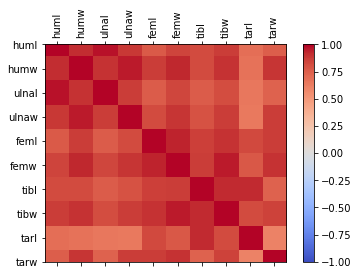

In [35]:
#First correlation analysis, the heat map helps but I need actual numbers
corr = birds_bones.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(birds_bones.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(birds_bones.columns)
ax.set_yticklabels(birds_bones.columns)
plt.show()

In [36]:
#Second try, much simpler, easier and overall, better correlation graph 
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
huml,1,0.917,0.976,0.887,0.771,0.85,0.827,0.869,0.695,0.751
humw,0.917,1,0.901,0.958,0.871,0.936,0.82,0.901,0.676,0.892
ulnal,0.976,0.901,1,0.872,0.76,0.838,0.763,0.819,0.655,0.738
ulnaw,0.887,0.958,0.872,1,0.826,0.898,0.797,0.87,0.643,0.871
feml,0.771,0.871,0.76,0.826,1,0.945,0.86,0.904,0.831,0.868
femw,0.85,0.936,0.838,0.898,0.945,1,0.868,0.959,0.779,0.901
tibl,0.827,0.82,0.763,0.797,0.86,0.868,1,0.929,0.923,0.738
tibw,0.869,0.901,0.819,0.87,0.904,0.959,0.929,1,0.826,0.855
tarl,0.695,0.676,0.655,0.643,0.831,0.779,0.923,0.826,1,0.606
tarw,0.751,0.892,0.738,0.871,0.868,0.901,0.738,0.855,0.606,1


Based off the correlation analysis above, the interactions below have the strongest correlations with each other: 

<0.87 or above>

huml - humw 

huml - ulnal 

huml - ulnaw

----

humw - ulnal 

humw - ulnaw 

humw - feml 

humw - femw

humw - tibw

humw - tarw

----

ulnal - ulnaw

ulnaw - tarw

----

feml - femw

feml - tibw

----

femw - ulnaw 

femw - tibl 

femw - tibw

femw - tarw

----

tibl - tibw

tibl - tarl

tibw - ulnaw

In [51]:
#First jab at logistic Regression 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report

log = LogisticRegression()

x = birds_bones.values

y = birds_types.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=40 )

log.fit(x_train, y_train)
y_pred = log.predict(x_test)

C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           P       0.69      0.52      0.59        21
           R       0.86      0.92      0.89        13
          SO       0.82      1.00      0.90        49
          SW       0.72      0.84      0.78        45
           T       0.88      0.70      0.78        10
           W       0.88      0.50      0.64        30

    accuracy                           0.79       168
   macro avg       0.81      0.75      0.76       168
weighted avg       0.79      0.79      0.77       168



In [53]:
result_class1 = accuracy_score(y_test,y_pred)
print("Accuracy:",result_class1)

Accuracy: 0.7857142857142857


Above in my prelimiary classification report, my model have a pretty good score for predicting all birds except P: Scansorial Birds

In [54]:
#Try 2, eliminated some parameters based off the initial correlation analysis above

birds_bones_corr_corrected = birds_bones[['humw', 'ulnal', 'ulnaw', 'feml', 'femw','tibw', 'tarw']]

#this is all parameters except the parameters I eliminated
corr2 = birds_bones_corr_corrected.corr()

corr2.style.background_gradient(cmap='coolwarm').set_precision(3)

,humw,ulnal,ulnaw,feml,femw,tibw,tarw
humw,1,0.901,0.958,0.871,0.936,0.901,0.892
ulnal,0.901,1,0.872,0.76,0.838,0.819,0.738
ulnaw,0.958,0.872,1,0.826,0.898,0.87,0.871
feml,0.871,0.76,0.826,1,0.945,0.904,0.868
femw,0.936,0.838,0.898,0.945,1,0.959,0.901
tibw,0.901,0.819,0.87,0.904,0.959,1,0.855
tarw,0.892,0.738,0.871,0.868,0.901,0.855,1


In [55]:
x1 = birds_bones_corr_corrected.values

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.4, random_state=40 )

log.fit(x_train, y_train)
y_pred = log.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           P       0.00      0.00      0.00        21
           R       0.69      0.85      0.76        13
          SO       0.64      1.00      0.78        49
          SW       0.66      0.91      0.77        45
           T       1.00      0.50      0.67        10
           W       0.78      0.23      0.36        30

    accuracy                           0.67       168
   macro avg       0.63      0.58      0.56       168
weighted avg       0.62      0.67      0.60       168



C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Try #2 yield terrible results, as in overall much lower f1-score as compare to Try #1. This tells me that the parameters that I removed were actually important to improving my Logistic Regression Analysis. I will check for the least important parameter and remove only that. 

In [56]:
result_class2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result_class2)

Accuracy: 0.6726190476190477


In [57]:
#Third try, removed tarl as in the inital test it has the least amount of correlation with all other parameters

birds_bones_corr_corrected2 = birds[['huml','humw','ulnal','ulnaw','feml','femw','tibl','tibw','tarw']]

corr3 = birds_bones_corr_corrected2.corr()

corr3.style.background_gradient(cmap='coolwarm').set_precision(3)

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarw
huml,1,0.917,0.976,0.887,0.771,0.85,0.827,0.869,0.751
humw,0.917,1,0.901,0.958,0.871,0.936,0.82,0.901,0.892
ulnal,0.976,0.901,1,0.872,0.76,0.838,0.763,0.819,0.738
ulnaw,0.887,0.958,0.872,1,0.826,0.898,0.797,0.87,0.871
feml,0.771,0.871,0.76,0.826,1,0.945,0.86,0.904,0.868
femw,0.85,0.936,0.838,0.898,0.945,1,0.868,0.959,0.901
tibl,0.827,0.82,0.763,0.797,0.86,0.868,1,0.929,0.738
tibw,0.869,0.901,0.819,0.87,0.904,0.959,0.929,1,0.855
tarw,0.751,0.892,0.738,0.871,0.868,0.901,0.738,0.855,1


In [58]:
x2 = birds_bones_corr_corrected2.values

x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size = 0.4, random_state=40 )

log.fit(x_train, y_train)
y_pred = log.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           P       0.71      0.57      0.63        21
           R       0.79      0.85      0.81        13
          SO       0.82      1.00      0.90        49
          SW       0.75      0.84      0.79        45
           T       0.88      0.70      0.78        10
           W       0.83      0.50      0.62        30

    accuracy                           0.79       168
   macro avg       0.79      0.74      0.76       168
weighted avg       0.79      0.79      0.77       168



C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


So far the best model, the support among the data is lower than expected. But this model has the highest f1-score. Will play aroun with the conditional parameters inside the code to see if I can improve the f1-score.

In [59]:
result_class2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result_class2)

Accuracy: 0.7857142857142857


In [43]:
x2 = birds_bones_corr_corrected2.values

x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size = 0.2, random_state=40 )

log.fit(x_train, y_train)
y_pred = log.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           P       0.86      0.60      0.71        10
           R       0.71      1.00      0.83         5
          SO       0.86      1.00      0.93        25
          SW       0.88      1.00      0.94        23
           T       0.75      0.60      0.67         5
           W       1.00      0.69      0.81        16

    accuracy                           0.87        84
   macro avg       0.84      0.81      0.81        84
weighted avg       0.88      0.87      0.86        84



C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [44]:
x2 = birds_bones_corr_corrected2.values

x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size = 0.1, random_state=40 )

log.fit(x_train, y_train)
y_pred = log.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           P       1.00      0.67      0.80         3
           R       1.00      1.00      1.00         3
          SO       0.88      1.00      0.93        14
          SW       0.94      1.00      0.97        15
           T       1.00      1.00      1.00         1
           W       1.00      0.67      0.80         6

    accuracy                           0.93        42
   macro avg       0.97      0.89      0.92        42
weighted avg       0.94      0.93      0.92        42



C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BoJangles\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Lowering the test sample size improved the f1-score greatly, but this is due to a much smaller test-sample size, in other words: the algothrim doesn't have a lot of training data so this makes it a worse algorithm than the one with a test_size of 0.4.

In [46]:
#Random Forest #1

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=30 )

model = RandomForestClassifier(n_estimators = 50)

#x = birds_bones.values

#y = birds_types.values

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[12  1  0  0  1  0]
 [ 0 19  0  1  0  0]
 [ 0  0 47  0  0  1]
 [ 0  1  4 38  0  4]
 [ 0  3  1  1  8  0]
 [ 5  1  2  9  0  9]]
Classification Report:
              precision    recall  f1-score   support

           P       0.71      0.86      0.77        14
           R       0.76      0.95      0.84        20
          SO       0.87      0.98      0.92        48
          SW       0.78      0.81      0.79        47
           T       0.89      0.62      0.73        13
           W       0.64      0.35      0.45        26

    accuracy                           0.79       168
   macro avg       0.77      0.76      0.75       168
weighted avg       0.78      0.79      0.78       168

Accuracy: 0.7916666666666666


C:\Users\BoJangles\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


In [47]:
#Random Forest #2 - n = 100

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=30 )

model = RandomForestClassifier(n_estimators = 100)

#x = birds_bones.values

#y = birds_types.values

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[10  2  1  0  1  0]
 [ 0 20  0  0  0  0]
 [ 0  0 48  0  0  0]
 [ 0  1  4 39  0  3]
 [ 0  3  1  1  8  0]
 [ 5  1  2  7  0 11]]
Classification Report:
              precision    recall  f1-score   support

           P       0.67      0.71      0.69        14
           R       0.74      1.00      0.85        20
          SO       0.86      1.00      0.92        48
          SW       0.83      0.83      0.83        47
           T       0.89      0.62      0.73        13
           W       0.79      0.42      0.55        26

    accuracy                           0.81       168
   macro avg       0.79      0.76      0.76       168
weighted avg       0.81      0.81      0.80       168

Accuracy: 0.8095238095238095


C:\Users\BoJangles\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [48]:
#Random Forest #3, using x2 and n=100

x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size = 0.4, random_state=30 )

model = RandomForestClassifier(n_estimators = 100)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)



Confusion Matrix:
[[11  1  1  0  1  0]
 [ 1 19  0  0  0  0]
 [ 0  0 47  0  1  0]
 [ 0  2  4 38  0  3]
 [ 0  3  1  1  8  0]
 [ 4  0  2  8  0 12]]
Classification Report:
              precision    recall  f1-score   support

           P       0.69      0.79      0.73        14
           R       0.76      0.95      0.84        20
          SO       0.85      0.98      0.91        48
          SW       0.81      0.81      0.81        47
           T       0.80      0.62      0.70        13
           W       0.80      0.46      0.59        26

    accuracy                           0.80       168
   macro avg       0.79      0.77      0.76       168
weighted avg       0.80      0.80      0.79       168

Accuracy: 0.8035714285714286


C:\Users\BoJangles\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [62]:
#Random Forest #4, using x2 and n=500

x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size = 0.4, random_state=30 )

model = RandomForestClassifier(n_estimators = 500)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

C:\Users\BoJangles\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Confusion Matrix:
[[11  1  1  0  1  0]
 [ 0 20  0  0  0  0]
 [ 0  0 46  0  1  1]
 [ 0  2  4 38  0  3]
 [ 0  3  1  1  8  0]
 [ 4  1  2  7  0 12]]
Classification Report:
              precision    recall  f1-score   support

           P       0.73      0.79      0.76        14
           R       0.74      1.00      0.85        20
          SO       0.85      0.96      0.90        48
          SW       0.83      0.81      0.82        47
           T       0.80      0.62      0.70        13
           W       0.75      0.46      0.57        26

    accuracy                           0.80       168
   macro avg       0.78      0.77      0.77       168
weighted avg       0.80      0.80      0.79       168

Accuracy: 0.8035714285714286


In [15]:
#SW 

birds_types = birds.groupby('type')
birds_SW = birds_types.get_group('SW')

#huml 
birds_SW_huml_value = birds_SW.huml
birds_SW_huml_average = sum(birds_SW_huml_value)/len(birds_SW_huml_value)
birds_SW_huml_std = np.std(birds_SW_huml_value)

#humw 
birds_SW_humw_value = birds_SW.humw
birds_SW_humw_average = sum(birds_SW_humw_value)/len(birds_SW_humw_value)
birds_SW_humw_std = np.std(birds_SW_humw_value)

#ulnal 
birds_SW_ulnal_value = birds_SW.ulnal
birds_SW_ulnal_average = sum(birds_SW_ulnal_value)/len(birds_SW_ulnal_value)
birds_SW_ulnal_std = np.std(birds_SW_ulnal_value)

#feml 
birds_SW_feml_value = birds_SW.feml
birds_SW_feml_average = sum(birds_SW_feml_value)/len(birds_SW_feml_value)
birds_SW_feml_std = np.std(birds_SW_feml_value)

#femw 
birds_SW_femw_value = birds_SW.femw 
birds_SW_femw_average = sum(birds_SW_femw_value)/len(birds_SW_femw_value)
birds_SW_femw_std = np.std(birds_SW_femw_value)

#tibl
birds_SW_tibl_value = birds_SW.tibl
birds_SW_tibl_average = sum(birds_SW_tibl_value)/len(birds_SW_tibl_value)
birds_SW_tibl_std = np.std(birds_SW_tibl_value)

#tarl
birds_SW_tarl_value = birds_SW.tarl
birds_SW_tarl_average = sum(birds_SW_tarl_value)/len(birds_SW_tarl_value)
birds_SW_tarl_std = np.std(birds_SW_tarl_value)

#tarw
birds_SW_tarw_value = birds_SW.tarw
birds_SW_tarw_average = sum(birds_SW_tarw_value)/len(birds_SW_tarw_value)
birds_SW_tarw_std = np.std(birds_SW_tarw_value)


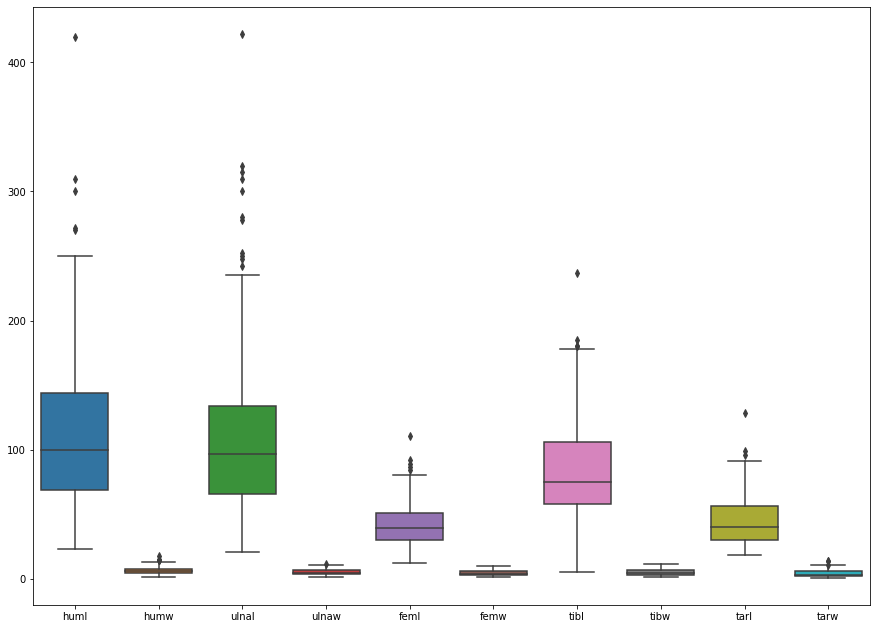

In [101]:
birds_SW_no_id =birds_SW.drop('id', 1)

fig, ax = plt.subplots()
fig.set_size_inches(15, 11)
sns.boxplot(ax =ax, data=birds_SW_no_id)

In [102]:
birds_SW_no_id.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,110.251121,6.423966,111.755517,5.221638,42.169655,4.275776,85.317069,4.513534,45.156207,4.149914
std,66.225024,3.283262,75.889706,2.346272,18.141428,2.151396,39.840920,2.309153,20.896670,2.677063
min,22.630000,1.630000,20.750000,1.510000,12.210000,0.970000,5.500000,1.010000,18.420000,0.830000
25%,68.412500,4.062500,65.687500,3.537500,29.967500,2.572500,57.587500,2.712500,30.125000,2.245000
50%,100.065000,5.735000,96.935000,4.685000,39.325000,3.660000,75.275000,4.035000,39.695000,3.225000
75%,143.500000,7.877500,133.750000,6.540000,51.020000,5.810000,106.030000,6.377500,56.137500,5.630000
max,420.000000,17.840000,422.000000,11.720000,110.540000,9.990000,237.000000,11.030000,128.350000,14.090000


In [105]:
#W
birds_types = birds.groupby('type')
birds_W = birds_types.get_group('W')

#huml 
birds_W_huml_value = birds_W.huml
birds_W_huml_average = sum(birds_W_huml_value)/len(birds_W_huml_value)
birds_W_huml_std = np.std(birds_W_huml_value)

#humw 
birds_W_humw_value = birds_SW.humw
birds_W_humw_average = sum(birds_W_humw_value)/len(birds_W_humw_value)
birds_W_humw_std = np.std(birds_W_humw_value)

#ulnal 
birds_W_ulnal_value = birds_W.ulnal
birds_W_ulnal_average = sum(birds_W_ulnal_value)/len(birds_W_ulnal_value)
birds_W_ulnal_std = np.std(birds_W_ulnal_value)

#feml 
birds_W_feml_value = birds_W.feml
birds_W_feml_average = sum(birds_W_feml_value)/len(birds_W_feml_value)
birds_W_feml_std = np.std(birds_W_feml_value)

#femw 
birds_W_femw_value = birds_W.femw 
birds_W_femw_average = sum(birds_W_femw_value)/len(birds_W_femw_value)
birds_W_femw_std = np.std(birds_W_femw_value)

#tibl
birds_W_tibl_value = birds_W.tibl
birds_W_tibl_average = sum(birds_W_tibl_value)/len(birds_W_tibl_value)
birds_W_tibl_std = np.std(birds_W_tibl_value)

#tarl
birds_W_tarl_value = birds_W.tarl
birds_W_tarl_average = sum(birds_W_tarl_value)/len(birds_W_tarl_value)
birds_W_tarl_std = np.std(birds_W_tarl_value)

#tarw
birds_W_tarw_value = birds_SW.tarw
birds_W_tarw_average = sum(birds_W_tarw_value)/len(birds_W_tarw_value)
birds_W_tarw_std = np.std(birds_W_tarw_value)


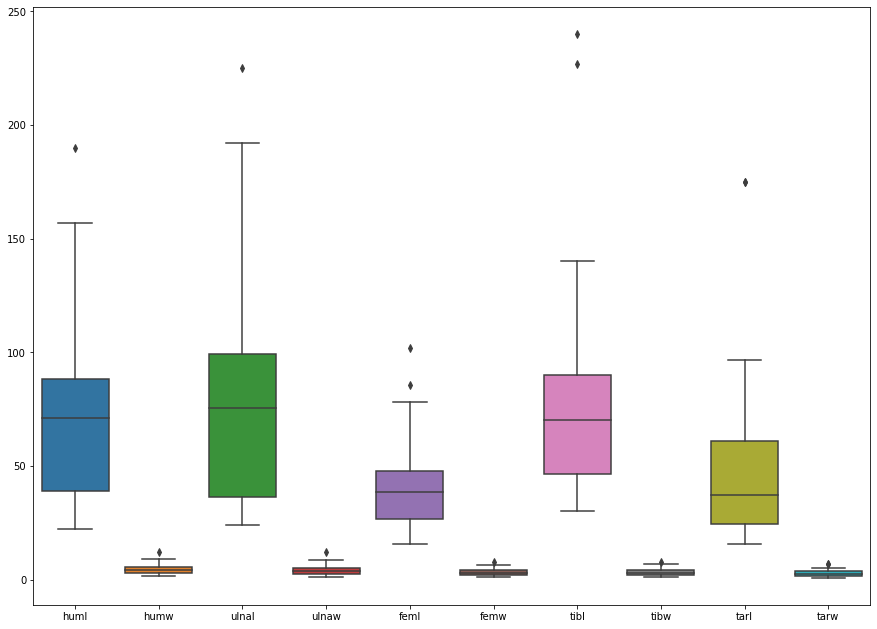

In [106]:
birds_W_no_id =birds_W.drop('id', 1)

fig, ax = plt.subplots()
fig.set_size_inches(15, 11)
sns.boxplot(ax =ax, data=birds_W_no_id)

In [107]:
birds_W_no_id.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,73.133077,4.607077,78.101385,4.102615,40.119538,3.129385,76.150000,3.179231,47.543385,2.760308
std,37.842339,2.122710,46.542322,1.933197,17.516904,1.400989,41.073856,1.476674,31.378102,1.330565
min,22.390000,1.530000,24.160000,1.290000,15.710000,1.140000,30.310000,0.990000,15.800000,0.830000
25%,38.790000,2.810000,36.330000,2.640000,26.840000,2.090000,46.240000,2.060000,24.640000,1.710000
50%,70.930000,4.340000,75.440000,3.840000,38.490000,3.020000,70.390000,2.990000,37.170000,2.530000
75%,88.160000,5.630000,99.310000,5.060000,47.890000,4.040000,89.930000,4.090000,60.810000,3.570000
max,190.000000,11.920000,225.000000,12.000000,101.750000,7.750000,240.000000,7.710000,175.000000,7.000000


In [108]:
#T
birds_types = birds.groupby('type')
birds_T = birds_types.get_group('T')

#huml 
birds_T_huml_value = birds_T.huml
birds_T_huml_average = sum(birds_T_huml_value)/len(birds_T_huml_value)
birds_T_huml_std = np.std(birds_T_huml_value)

#humw 
birds_T_humw_value = birds_T.humw
birds_T_humw_average = sum(birds_T_humw_value)/len(birds_T_humw_value)
birds_T_humw_std = np.std(birds_T_humw_value)

#ulnal 
birds_T_ulnal_value = birds_T.ulnal
birds_T_ulnal_average = sum(birds_T_ulnal_value)/len(birds_T_ulnal_value)
birds_T_ulnal_std = np.std(birds_T_ulnal_value)

#feml 
birds_T_feml_value = birds_T.feml
birds_T_feml_average = sum(birds_T_feml_value)/len(birds_T_feml_value)
birds_T_feml_std = np.std(birds_T_feml_value)

#femw 
birds_T_femw_value = birds_T.femw 
birds_T_femw_average = sum(birds_T_femw_value)/len(birds_T_femw_value)
birds_T_femw_std = np.std(birds_T_femw_value)

#tibl
birds_T_tibl_value = birds_T.tibl
birds_T_tibl_average = sum(birds_T_tibl_value)/len(birds_T_tibl_value)
birds_T_tibl_std = np.std(birds_T_tibl_value)

#tarl
birds_T_tarl_value = birds_T.tarl
birds_T_tarl_average = sum(birds_T_tarl_value)/len(birds_T_tarl_value)
birds_T_tarl_std = np.std(birds_T_tarl_value)

#tarw
birds_T_tarw_value = birds_T.tarw
birds_T_tarw_average = sum(birds_T_tarw_value)/len(birds_T_tarw_value)
birds_T_tarw_std = np.std(birds_T_tarw_value)


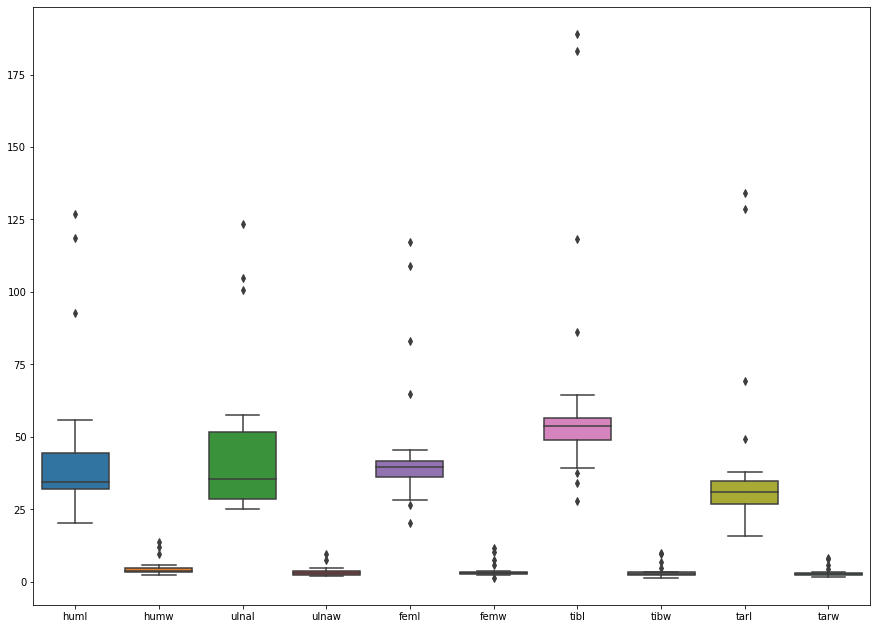

In [109]:
birds_T_no_id =birds_T.drop('id', 1)

fig, ax = plt.subplots()
fig.set_size_inches(15, 11)
sns.boxplot(ax =ax, data=birds_T_no_id)

In [110]:
birds_T_no_id.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,45.699565,4.786087,45.617391,3.471739,46.277391,3.819565,66.090870,3.451739,40.086522,3.183913
std,28.068796,2.944815,27.230427,1.796931,24.507726,2.573380,41.865969,2.273169,30.708129,1.746846
min,20.250000,2.350000,25.140000,1.760000,20.170000,1.370000,27.670000,1.410000,15.680000,1.550000
25%,32.065000,3.290000,28.635000,2.430000,36.235000,2.645000,49.035000,2.380000,26.780000,2.340000
50%,34.240000,3.600000,35.240000,2.910000,39.380000,2.870000,53.770000,2.710000,31.000000,2.490000
75%,44.275000,4.715000,51.580000,3.765000,41.715000,3.365000,56.435000,3.155000,34.820000,2.945000
max,127.000000,13.790000,123.270000,9.420000,117.070000,11.640000,189.000000,10.030000,134.000000,8.190000


In [111]:
#R
birds_types = birds.groupby('type')
birds_R = birds_types.get_group('R')

#huml 
birds_R_huml_value = birds_R.huml
birds_R_huml_average = sum(birds_R_huml_value)/len(birds_R_huml_value)
birds_R_huml_std = np.std(birds_R_huml_value)

#humw 
birds_R_humw_value = birds_R.humw
birds_R_humw_average = sum(birds_R_humw_value)/len(birds_R_humw_value)
birds_R_humw_std = np.std(birds_R_humw_value)

#ulnal 
birds_R_ulnal_value = birds_R.ulnal
birds_R_ulnal_average = sum(birds_R_ulnal_value)/len(birds_R_ulnal_value)
birds_R_ulnal_std = np.std(birds_R_ulnal_value)

#feml 
birds_R_feml_value = birds_R.feml
birds_R_feml_average = sum(birds_R_feml_value)/len(birds_R_feml_value)
birds_R_feml_std = np.std(birds_R_feml_value)

#femw 
birds_R_femw_value = birds_R.femw 
birds_R_femw_average = sum(birds_R_femw_value)/len(birds_R_femw_value)
birds_R_femw_std = np.std(birds_R_femw_value)

#tibl
birds_R_tibl_value = birds_R.tibl
birds_R_tibl_average = sum(birds_R_tibl_value)/len(birds_R_tibl_value)
birds_R_tibl_std = np.std(birds_R_tibl_value)

#tarl
birds_R_tarl_value = birds_R.tarl
birds_R_tarl_average = sum(birds_R_tarl_value)/len(birds_R_tarl_value)
birds_R_tarl_std = np.std(birds_R_tarl_value)

#tarw
birds_R_tarw_value = birds_R.tarw
birds_R_tarw_average = sum(birds_R_tarw_value)/len(birds_R_tarw_value)

birds_R_tarw_std = np.std(birds_R_tarw_value)

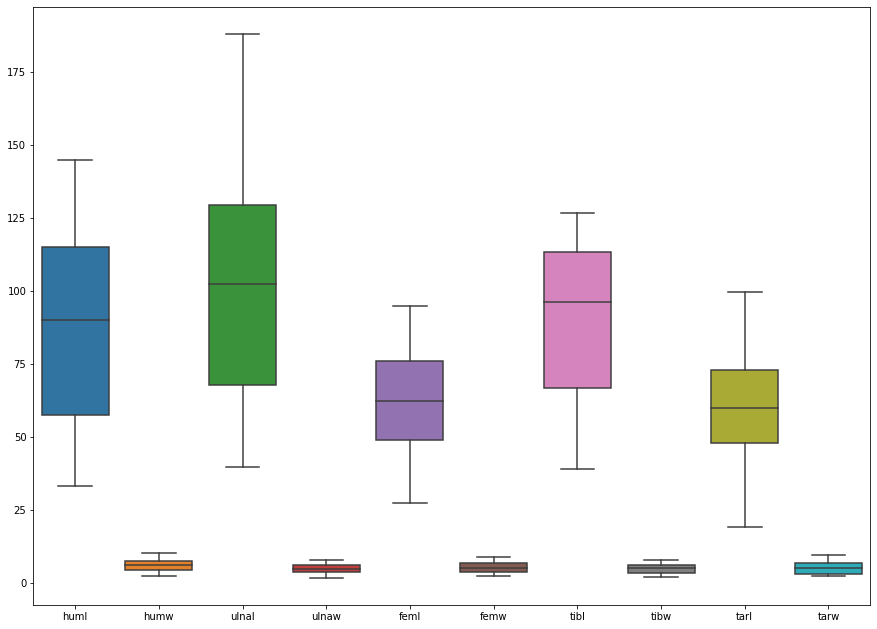

In [112]:
birds_R_no_id =birds_R.drop('id', 1)

fig, ax = plt.subplots()
fig.set_size_inches(15, 11)
sns.boxplot(ax =ax, data=birds_R_no_id)

In [113]:
birds_R_no_id.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,86.934400,6.065600,100.342400,4.813200,62.02000,5.266800,89.877400,4.949200,59.166400,5.073800
std,31.715294,2.170025,37.421882,1.632821,18.07129,1.859652,26.489156,1.701189,18.898907,2.001062
min,33.120000,2.400000,39.850000,1.800000,27.46000,2.190000,38.990000,2.150000,19.100000,2.220000
25%,57.500000,4.395000,67.627500,3.595000,48.84000,3.782500,66.585000,3.477500,48.062500,3.185000
50%,89.880000,6.125000,102.370000,4.805000,62.31500,5.060000,96.360000,4.935000,60.045000,5.010000
75%,115.025000,7.550000,129.312500,6.157500,76.15500,6.670000,113.207500,6.115000,72.792500,6.637500
max,145.000000,10.370000,188.000000,7.920000,94.79000,8.920000,126.540000,7.900000,99.720000,9.640000


In [114]:
#P
birds_types = birds.groupby('type')
birds_P = birds_types.get_group('P')

#huml 
birds_P_huml_value = birds_P.huml
birds_P_huml_average = sum(birds_P_huml_value)/len(birds_P_huml_value)
birds_P_huml_std = np.std(birds_P_huml_value)

#humw 
birds_P_humw_value = birds_P.humw
birds_P_humw_average = sum(birds_P_humw_value)/len(birds_P_humw_value)
birds_P_humw_std = np.std(birds_P_humw_value)

#ulnal 
birds_P_ulnal_value = birds_P.ulnal
birds_P_ulnal_average = sum(birds_P_ulnal_value)/len(birds_P_ulnal_value)
birds_P_ulnal_std = np.std(birds_P_ulnal_value)

#feml 
birds_P_feml_value = birds_R.feml
birds_P_feml_average = sum(birds_P_feml_value)/len(birds_P_feml_value)
birds_P_feml_std = np.std(birds_P_feml_value)

#femw 
birds_P_femw_value = birds_P.femw 
birds_P_femw_average = sum(birds_P_femw_value)/len(birds_P_femw_value)
birds_P_femw_std = np.std(birds_P_femw_value)

#tibl
birds_P_tibl_value = birds_P.tibl
birds_P_tibl_average = sum(birds_P_tibl_value)/len(birds_P_tibl_value)
birds_P_tibl_std = np.std(birds_P_tibl_value)

#tarl
birds_P_tarl_value = birds_P.tarl
birds_P_tarl_average = sum(birds_P_tarl_value)/len(birds_P_tarl_value)
birds_P_tarl_std = np.std(birds_P_tarl_value)

#tarw
birds_P_tarw_value = birds_P.tarw
birds_P_tarw_average = sum(birds_P_tarw_value)/len(birds_P_tarw_value)
birds_P_tarw_std = np.std(birds_P_tarw_value)

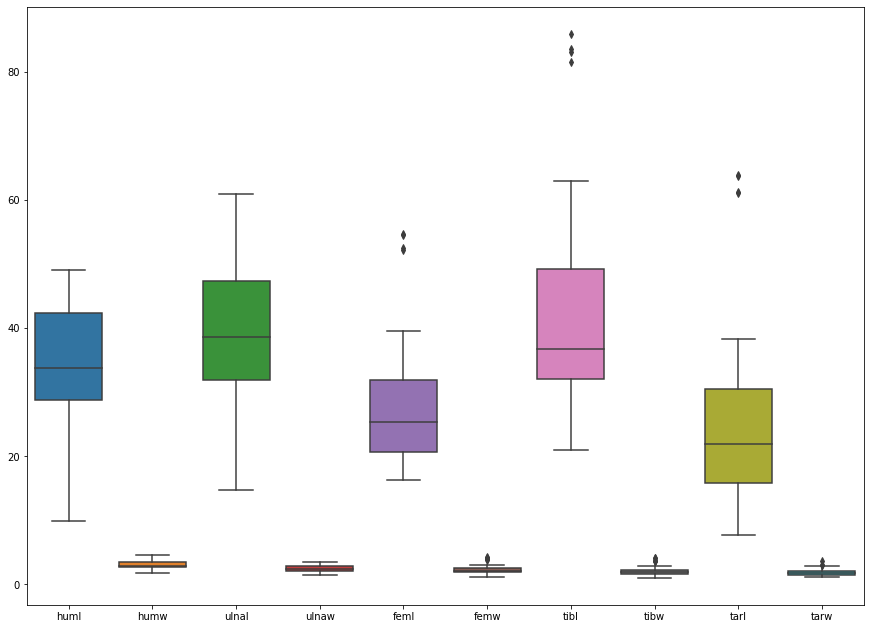

In [115]:
birds_P_no_id =birds_P.drop('id', 1)

fig, ax = plt.subplots()
fig.set_size_inches(15, 11)
sns.boxplot(ax =ax, data=birds_P_no_id)

In [116]:
birds_P_no_id.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,34.423947,3.039211,39.177368,2.476316,28.217368,2.307895,41.881316,2.095789,25.787368,1.902632
std,9.399708,0.631918,11.638906,0.580305,10.613094,0.803836,17.146487,0.801430,14.836621,0.573452
min,9.850000,1.730000,14.730000,1.410000,16.270000,1.210000,20.890000,1.050000,7.770000,1.160000
25%,28.697500,2.660000,31.962500,2.067500,20.640000,1.980000,31.970000,1.632500,15.822500,1.532500
50%,33.800000,2.930000,38.555000,2.415000,25.400000,2.135000,36.650000,1.885000,21.895000,1.740000
75%,42.305000,3.492500,47.305000,2.900000,31.857500,2.505000,49.235000,2.282500,30.540000,2.057500
max,49.120000,4.640000,60.950000,3.520000,54.670000,4.250000,85.880000,4.120000,63.910000,3.600000


In [117]:
#SO
birds_types = birds.groupby('type')
birds_SO = birds_types.get_group('SO')

#huml 
birds_SO_huml_value = birds_SO.huml
birds_SO_huml_average = sum(birds_SO_huml_value)/len(birds_SO_huml_value)
birds_SO_huml_std = np.std(birds_SO_huml_value)

#humw 
birds_SO_humw_value = birds_SO.humw
birds_SO_humw_average = sum(birds_SO_humw_value)/len(birds_SO_humw_value)
birds_SO_humw_std = np.std(birds_SO_humw_value)

#ulnal 
birds_SO_ulnal_value = birds_SO.ulnal
birds_SO_ulnal_average = sum(birds_SO_ulnal_value)/len(birds_SO_ulnal_value)
birds_SO_ulnal_std = np.std(birds_SO_ulnal_value)

#feml 
birds_SO_feml_value = birds_SO.feml
birds_SO_feml_average = sum(birds_SO_feml_value)/len(birds_SO_feml_value)
birds_SO_feml_std = np.std(birds_SO_feml_value)

#femw 
birds_SO_femw_value = birds_SO.femw 
birds_SO_femw_average = sum(birds_SO_femw_value)/len(birds_SO_femw_value)
birds_SO_femw_std = np.std(birds_SO_femw_value)

#tibl
birds_SO_tibl_value = birds_SO.tibl
birds_SO_tibl_average = sum(birds_SO_tibl_value)/len(birds_SO_tibl_value)
birds_SO_tibl_std = np.std(birds_SO_tibl_value)

#tarl
birds_SO_tarl_value = birds_SO.tarl
birds_SO_tarl_average = sum(birds_SO_tarl_value)/len(birds_SO_tarl_value)
birds_SO_tarl_std = np.std(birds_SO_tarl_value)

#tarw
birds_SO_tarw_value = birds_SO.tarw
birds_SO_tarw_average = sum(birds_SO_tarw_value)/len(birds_SO_tarw_value)
birds_SO_tarw_std = np.std(birds_SO_tarw_value)

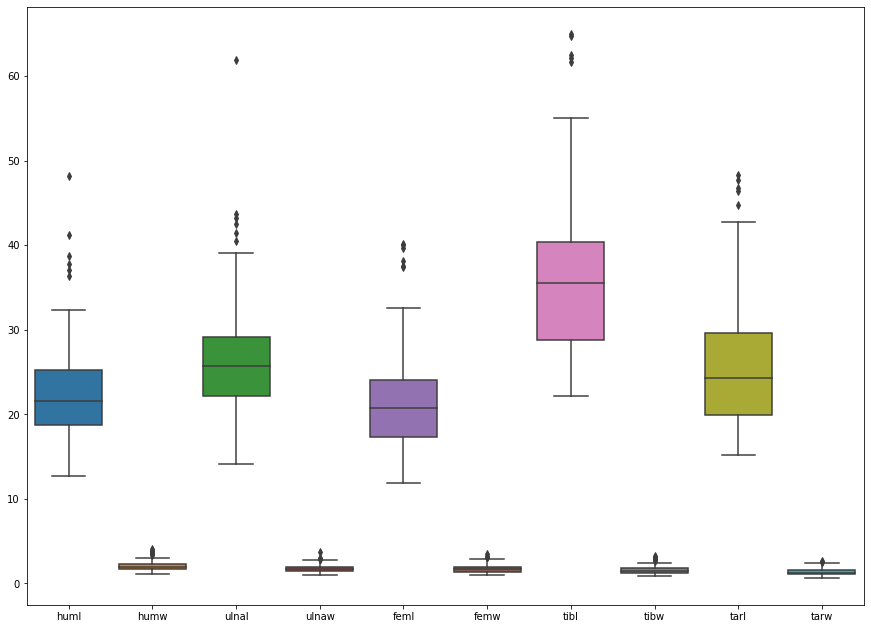

In [118]:
birds_SO_no_id =birds_SO.drop('id', 1)

fig, ax = plt.subplots()
fig.set_size_inches(15, 11)
sns.boxplot(ax =ax, data=birds_SO_no_id)

In [119]:
birds_SO_no_id.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,22.361094,2.029766,26.398125,1.743828,21.383438,1.680313,36.326094,1.548750,25.842656,1.349375
std,6.087455,0.548825,6.895327,0.470743,6.072384,0.505430,9.680947,0.492154,7.525482,0.423478
min,12.690000,1.140000,14.090000,1.000000,11.830000,0.930000,22.130000,0.870000,15.190000,0.660000
25%,18.687500,1.670000,22.122500,1.415000,17.240000,1.280000,28.825000,1.220000,19.845000,1.047500
50%,21.605000,1.935000,25.720000,1.710000,20.735000,1.640000,35.535000,1.430000,24.310000,1.265000
75%,25.270000,2.320000,29.185000,1.952500,24.020000,1.910000,40.375000,1.775000,29.647500,1.602500
max,48.200000,4.080000,61.940000,3.750000,40.110000,3.510000,64.970000,3.210000,48.350000,2.570000
